In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



In [2]:
type(data)

dict

In [3]:
import pandas as pd


#allow me to see fulall columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10279,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.942051e+07,1.942051e+07,False,NaN,1,NaN,NaN,None,2023-07-05T11:06:00.000Z,30446.690048,1.161830e+10,-28.4839,-0.810947,-1.834583,0.328683,13.773297,4.081224,9.252871,5.912901e+11,49.6656,6.393805e+11,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
1,1027,Ethereum,ETH,ethereum,7069,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202176e+08,1.202176e+08,True,NaN,2,NaN,NaN,None,2023-07-05T11:06:00.000Z,1912.790734,5.584091e+09,-20.0938,-0.527286,-2.264700,2.626205,2.399037,-0.889256,2.676542,2.299510e+11,19.3148,2.299510e+11,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
2,825,Tether,USDT,tether,56215,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.335458e+10,8.573353e+10,True,NaN,3,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.999910,2.026929e+10,-19.8943,-0.014324,-0.012984,-0.013107,-0.025940,-0.131400,-0.032244,8.334709e+10,7.0008,8.572582e+10,None,2023-07-05T11:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-05 12:08:10.071131
3,1839,BNB,BNB,bnb,1475,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558506e+08,1.558506e+08,False,NaN,4,NaN,NaN,None,2023-07-05T11:06:00.000Z,238.092973,4.466353e+08,-15.9635,-1.366565,-2.987242,1.719710,-20.821748,-26.766042,-23.590975,3.710692e+10,3.1156,3.710692e+10,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
4,3408,USD Coin,USDC,usd-coin,13198,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.771953e+10,2.771953e+10,False,NaN,5,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.999829,2.761801e+09,-22.6814,-0.001210,-0.006046,-0.025454,-0.022518,-0.014535,-0.008176,2.771478e+10,2.3310,2.771478e+10,None,2023-07-05T11:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-05 12:08:10.071131
5,52,XRP,XRP,xrp,972,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.476836,9.088144e+08,-10.7386,-1.527054,-2.243844,0.137753,-10.423185,3.225994,-3.930191,2.491671e+10,2.0957,4.768357e+10,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
6,2010,Cardano,ADA,cardano,850,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.495588e+10,3.595238e+10,False,NaN,7,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.286738,2.172460e+08,-6.1987,-1.889485,-3.049234,3.965897,-23.234765,-25.739044,-24.465822,1.002317e+10,0.8428,1.290320e+10,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.400465e+11,1.400465e+11,True,NaN,8,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.066817,5.005301e+08,64.8568,-1.817318,-2.001970,3.580075,-6.846845,-14.353990,-24.988993,9.357536e+09,0.7870,9.357536e+09,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
8,2,Litecoin,LTC,litecoin,932,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]"

In [6]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '29ec1ee3-cba7-4ffb-8218-a7b145f26847',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    
    # This keeps data in a data frame
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)



In [8]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

AttributeError: 'DataFrame' object has no attribute 'append'

In [9]:
df72 = pd.read_csv(r'C:\Users\eddiekung.py\OneDrive\Documents\Python Scripts\API.csv')
df72

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\alexf\\OneDrive\\Documents\\Python Scripts\\API.csv'

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10279,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.942051e+07,1.942051e+07,False,NaN,1,NaN,NaN,None,2023-07-05T11:06:00.000Z,30446.690048,1.161830e+10,-28.4839,-0.810947,-1.834583,0.328683,13.773297,4.081224,9.252871,5.912901e+11,49.6656,6.393805e+11,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
1,1027,Ethereum,ETH,ethereum,7069,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202176e+08,1.202176e+08,True,NaN,2,NaN,NaN,None,2023-07-05T11:06:00.000Z,1912.790734,5.584091e+09,-20.0938,-0.527286,-2.264700,2.626205,2.399037,-0.889256,2.676542,2.299510e+11,19.3148,2.299510e+11,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
2,825,Tether,USDT,tether,56215,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.335458e+10,8.573353e+10,True,NaN,3,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.999910,2.026929e+10,-19.8943,-0.014324,-0.012984,-0.013107,-0.025940,-0.131400,-0.032244,8.334709e+10,7.0008,8.572582e+10,None,2023-07-05T11:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-05 12:08:10.071131
3,1839,BNB,BNB,bnb,1475,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558506e+08,1.558506e+08,False,NaN,4,NaN,NaN,None,2023-07-05T11:06:00.000Z,238.092973,4.466353e+08,-15.9635,-1.366565,-2.987242,1.719710,-20.821748,-26.766042,-23.590975,3.710692e+10,3.1156,3.710692e+10,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
4,3408,USD Coin,USDC,usd-coin,13198,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.771953e+10,2.771953e+10,False,NaN,5,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.999829,2.761801e+09,-22.6814,-0.001210,-0.006046,-0.025454,-0.022518,-0.014535,-0.008176,2.771478e+10,2.3310,2.771478e+10,None,2023-07-05T11:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-05 12:08:10.071131
5,52,XRP,XRP,xrp,972,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.476836,9.088144e+08,-10.7386,-1.527054,-2.243844,0.137753,-10.423185,3.225994,-3.930191,2.491671e+10,2.0957,4.768357e+10,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
6,2010,Cardano,ADA,cardano,850,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.495588e+10,3.595238e+10,False,NaN,7,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.286738,2.172460e+08,-6.1987,-1.889485,-3.049234,3.965897,-23.234765,-25.739044,-24.465822,1.002317e+10,0.8428,1.290320e+10,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.400465e+11,1.400465e+11,True,NaN,8,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.066817,5.005301e+08,64.8568,-1.817318,-2.001970,3.580075,-6.846845,-14.353990,-24.988993,9.357536e+09,0.7870,9.357536e+09,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
8,2,Litecoin,LTC,litecoin,932,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]"

In [11]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10279,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19420506.00000,19420506.00000,False,NaN,1,NaN,NaN,None,2023-07-05T11:06:00.000Z,30446.69005,11618300859.02505,-28.48390,-0.81095,-1.83458,0.32868,13.77330,4.08122,9.25287,591290126761.68054,49.66560,639380491012.70996,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
1,1027,Ethereum,ETH,ethereum,7069,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120217554.82295,120217554.82295,True,NaN,2,NaN,NaN,None,2023-07-05T11:06:00.000Z,1912.79073,5584090767.08017,-20.09380,-0.52729,-2.26470,2.62620,2.39904,-0.88926,2.67654,229951024886.92712,19.31480,229951024886.92999,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
2,825,Tether,USDT,tether,56215,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83354583088.86713,85733529362.29855,True,NaN,3,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.99991,20269286390.61710,-19.89430,-0.01432,-0.01298,-0.01311,-0.02594,-0.13140,-0.03224,83347087026.17374,7.00080,85725819361.39000,None,2023-07-05T11:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-05 12:08:10.071131
3,1839,BNB,BNB,bnb,1475,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155850563.11656,155850563.11656,False,NaN,4,NaN,NaN,None,2023-07-05T11:06:00.000Z,238.09297,446635316.98658,-15.96350,-1.36656,-2.98724,1.71971,-20.82175,-26.76604,-23.59098,37106923951.71434,3.11560,37106923951.71000,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
4,3408,USD Coin,USDC,usd-coin,13198,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27719527957.63092,27719527957.63092,False,NaN,5,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.99983,2761801201.81110,-22.68140,-0.00121,-0.00605,-0.02545,-0.02252,-0.01454,-0.00818,27714781533.56000,2.33100,27714781533.56000,None,2023-07-05T11:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-05 12:08:10.071131
5,52,XRP,XRP,xrp,972,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52254289650.00000,99988655562.00000,False,NaN,6,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.47684,908814379.98440,-10.73860,-1.52705,-2.24384,0.13775,-10.42318,3.22599,-3.93019,24916708868.27146,2.09570,47683566335.25000,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
6,2010,Cardano,ADA,cardano,850,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34955884347.47300,35952377800.23500,False,NaN,7,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.28674,217245983.90900,-6.19870,-1.88948,-3.04923,3.96590,-23.23476,-25.73904,-24.46582,10023174507.24257,0.84280,12903202457.77000,None,2023-07-05T11:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-05 12:08:10.071131
7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140046476383.70517,140046476383.70517,True,NaN,8,NaN,NaN,None,2023-07-05T11:06:00.000Z,0.06682,500530109.50073,64.85680,-1.81732,-2.00197,3.58007,-6.84684,-14.35399,-24.98899,9357535620.37454,0.78700,9357535620.37000,None,2023-07-05T

In [13]:
# This looks at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.81095,-1.83458,0.32868,13.77330,4.08122,9.25287
Ethereum,-0.52729,-2.26470,2.62620,2.39904,-0.88926,2.67654
Tether,-0.01432,-0.01298,-0.01311,-0.02594,-0.13140,-0.03224
BNB,-1.36656,-2.98724,1.71971,-20.82175,-26.76604,-23.59098
USD Coin,-0.00121,-0.00605,-0.02545,-0.02252,-0.01454,-0.00818
XRP,-1.52705,-2.24384,0.13775,-10.42318,3.22599,-3.93019
Cardano,-1.88948,-3.04923,3.96590,-23.23476,-25.73904,-24.46582
Dogecoin,-1.81732,-2.00197,3.58007,-6.84684,-14.35399,-24.98899
Litecoin,-1.91733,-3.09165,20.51416,11.80506,19.61421,14.60045


In [14]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.81095
                 quote.USD.percent_change_24h    -1.83458
                 quote.USD.percent_change_7d      0.32868
                 quote.USD.percent_change_30d    13.77330
                 quote.USD.percent_change_60d     4.08122
                 quote.USD.percent_change_90d     9.25287
Ethereum         quote.USD.percent_change_1h     -0.52729
                 quote.USD.percent_change_24h    -2.26470
                 quote.USD.percent_change_7d      2.62620
                 quote.USD.percent_change_30d     2.39904
                 quote.USD.percent_change_60d    -0.88926
                 quote.USD.percent_change_90d     2.67654
Tether           quote.USD.percent_change_1h     -0.01432
                 quote.USD.percent_change_24h    -0.01298
                 quote.USD.percent_change_7d     -0.01311
                 quote.USD.percent_change_30d    -0.02594
                 quote.USD

In [29]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.81095
                quote.USD.percent_change_24h  -1.83458
                quote.USD.percent_change_7d    0.32868
                quote.USD.percent_change_30d  13.77330
                quote.USD.percent_change_60d   4.08122
                quote.USD.percent_change_90d   9.25287
Ethereum        quote.USD.percent_change_1h   -0.52729
                quote.USD.percent_change_24h  -2.26470
                quote.USD.percent_change_7d    2.62620
                quote.USD.percent_change_30d   2.39904
                quote.USD.percent_change_60d  -0.88926
                quote.USD.percent_change_90d   2.67654
Tether          quote.USD.percent_change_1h   -0.01432
                quote.USD.percent_change_24h  -0.01298
                quote.USD.percent_change_7d   -0.01311
                quote.USD.percent_change_30d  -0.02594
                quote.USD.percent_change_60d  -0.13140
                quote.USD.percent_change_90d  -0.03224
BNB             quote.USD.percent_change_1h   -1.36656
                quote.USD.percent_change_24h  -2.98724
                quote.USD.percent_change_7d    1.71971
                quote.USD.percent_change_30d -20.82175
                quote.USD.percent_change_60d -26.76604
                quote.USD.percent_change_90d -23.59098
USD Coin        quote.USD.percent_change_1h   -0.00121
                quote.USD.percent_change_24h  -0.00605
                quote.USD.percent_change_7d   -0.02545
                quote.USD.percent_change_30d  -0.02252
                quote.USD.percent_change_60d  -0.01454
                quote.USD.percent_change_90d  -0.00818
XRP             quote.USD.percent_change_1h   -1.52705
                quote.USD.percent_change_24h  -2.24384
                quote.USD.percent_change_7d    0.13775
                quote.USD.percent_change_30d -10.42318
                quote.USD.percent_change_60d   3.22599
                quote.USD.percent_change_90d  -3.93019
Cardano         quote.USD.percent_change_1h   -1.88948
                quote.USD.percent_change_24h  -3.04923
                quote.USD.percent_change_7d    3.96590
                quote.USD.percent_change_30d -23.23476
                quote.USD.percent_change_60d -25.73904
                quote.USD.percent_change_90d -24.46582
Dogecoin        quote.USD.percent_change_1h   -1.81732
                quote.USD.percent_change_24h  -2.00197
                quote.USD.percent_change_7d    3.58007
                quote.USD.percent_change_30d  -6.84684
                quote.USD.percent_change_60d -14.35399
                quote.USD.percent_change_90d -24.98899
Litecoin        quote.USD.percent_change_1h   -1.91733
                quote.USD.percent_change_24h  -3.09165
                quote.USD.percent_change_7d   20.51416
                quote.USD.percent_change_30d  11.80506
                quote.USD.percent_change_60d  19.61421
                quote.USD.percent_change_90d  14.60045
Solana          quote.USD.percent_change_1h   -2.09440
                quote.USD.percent_change_24h  -2.44846
                quote.USD.percent_change_7d   15.58954
                quote.USD.percent_change_30d -13.44786
                quote.USD.percent_change_60d -17.01712
                quote.USD.percent_change_90d  -8.99928
TRON            quote.USD.percent_change_1h   -0.66678
                quote.USD.percent_change_24h  -1.59535
                quote.USD.percent_change_7d    3.68789
                quote.USD.percent_change_30d  -5.52013
                quote.USD.percent_change_60d   9.34203
                quote.USD.percent_change_90d  16.44052
Polygon         quote.USD.percent_change_1h   -1.76248
                quote.USD.percent_change_24h  -3.01875
                quote.USD.percent_change_7d    7.50456
                quote.USD.percent_change_30d -23.16549
                quote.USD.percent_change_60d -29.78666
                quote.USD.percent

In [17]:
df5.count()

values    90
dtype: int64

In [28]:



index = pd.Index(range(90))
df6 = df5.set_index(index)
df6



,values
0,-0.81095
1,-1.83458
2,0.32868
3,13.77330
4,4.08122
5,9.25287
6,-0.52729
7,-2.26470
8,2.62620
9,2.39904


In [27]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

NameError: name 'df6' is not defined

In [26]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

NameError: name 'df7' is not defined

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

NameError: name 'df7' is not defined

In [24]:


df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,30446.69005,2023-07-05 12:08:10.071131


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

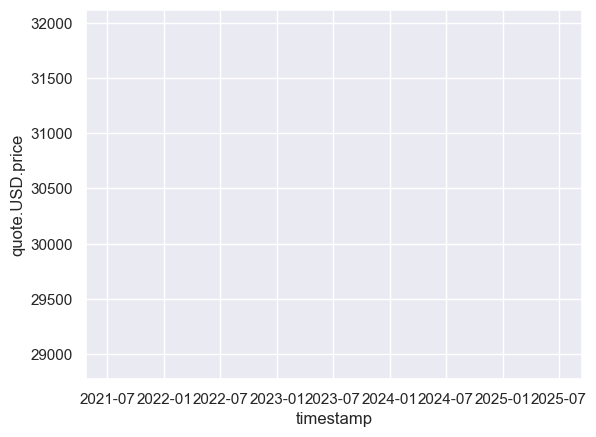

In [23]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)